In [1]:
"""
The script includes all the relevant plots of the patient analysis section (Fig. 5A, Fig. S4).
"""

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)

In [2]:
results_path = os.path.join('..', '..', 'Results', 'Patients Analysis Results New Imputation2')
patient_files_list = os.listdir(results_path)
patient_files_list = [x for x in patient_files_list if 'csv' in x]

print('patient_files_list:', len(patient_files_list), patient_files_list)
capice_path = os.path.join('..', '..', 'Data', 'CAPICE_All_Patients_Predictions.csv')
Capice_data = pd.read_csv(capice_path)
Capice_data = Capice_data.rename(columns = {'Chromosome': '#Chr', 'Position': 'Pos'}, inplace=False)



patient_files_list: 58 ['AFOtB1305_Heart - Left Ventricle_Rank.csv', 'CardiomyopathyOtB0551_Heart - Left Ventricle_Rank.csv', 'HSP13393_Muscle - Skeletal_Rank.csv', 'CardiacNeuralSyndrome41621_Heart - Left Ventricle_Rank.csv', 'Musculardystrophy13879_Muscle - Skeletal_Rank.csv', 'Zellwegersyndrome13414_brain_Rank.csv', 'SeckelSyndromeSS2_brain_Rank.csv', 'Leighsyndrome766M_brain_Rank.csv', 'Skin16264_Skin - Not Sun Exposed_Rank.csv', 'MicrocephalyOt1097_brain_Rank.csv', 'PCCAOt1103_brain_Rank.csv', 'NPHPOt1114_brain_Rank.csv', 'NPHPOt1114_kidney_Rank.csv', 'diaphragmaticherniaOt2822_Muscle - Skeletal_Rank.csv', 'SpasticParaparesisOt5005_Muscle - Skeletal_Rank.csv', 'MicrocephalyOt5010_brain_Rank.csv', 'MicrocephalyOB2_brain_Rank.csv', 'NTDOtA4611_brain_Rank.csv', 'HypotoniadevdelayOtA8152_brain_Rank.csv', 'HypotoniadevdelayOtA8152_Muscle - Skeletal_Rank.csv', 'EctodermalOtB0548_Skin - Not Sun Exposed_Rank.csv', 'EctodermalOtB0549_Skin - Not Sun Exposed_Rank.csv', 'Strabismus13556_brain

In [3]:
"""----------------------- Functions -----------------------------------------------"""
def load_annotations_file(Patient_data, file_name):

    anotation_files_path = os.path.join('..', '..', 'Data', 'Birk data', 'Patient_specific_dataset')
    patient_files_list = os.listdir(anotation_files_path)
    short_name = file_name.split('_')[0]
    relevant_anotation_name = [x for x in patient_files_list if short_name in x][0]
    path = os.path.join('..', '..', 'Data', 'Birk data', 'Patient_specific_dataset', relevant_anotation_name)
    Annotations_file = pd.read_csv(path, engine='python')

    return Annotations_file

def add_relevant_scores(Annotations_file, Patient_data):
    Relevant_scores_data = Annotations_file[['#Chr', 'Pos', 'Type', 'SIFTval', 'PolyPhenVal']]
    Patient_data = pd.merge(Patient_data, Relevant_scores_data,  how='left', on=['#Chr', 'Pos', 'Type'])
    return Patient_data

def add_capice_scores(Patient_data, Capice_data):
    Patient_data['#Chr'] = Patient_data['#Chr'].astype(str)
    Patient_data = pd.merge(Patient_data, Capice_data,  how='left', on=['#Chr', 'Pos', 'Ref'])
    return Patient_data


---------------------- 1 AFOtB1305_Heart - Left Ventricle --------------------------
   Unnamed: 0 GeneName         GeneID_y #Chr        Pos   Ref Alt_x Type  \
0          95    XIRP1  ENSG00000168334    3   39227886   ATG     A  DEL   
1         416     ENO3  ENSG00000108515   17    4859921     G     A  SNV   
2         187     TRDN  ENSG00000186439    6  123696752     G     A  SNV   
3         489     BMP7  ENSG00000101144   20   55777618     C     T  SNV   
4          44    OBSCN  ENSG00000154358    1  228538629     C     T  SNV   
5         472      HRC  ENSG00000130528   19   49657717  ACAT     A  DEL   
6         226    KCNH2  ENSG00000055118    7  150642485     G     T  SNV   
7          43    OBSCN  ENSG00000154358    1  228495112     G     A  SNV   
8         135     ANK2  ENSG00000145362    4  114294462     C     T  SNV   
9         247     STOM  ENSG00000148175    9  124110300     C     T  SNV   

   Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
0       2 

    Unnamed: 0 GeneName         GeneID_y #Chr        Pos  Ref Alt_x Type  \
42          59   RECQL4  ENSG00000160957    8  145737635    A     T  SNV   
43          60   RECQL4  ENSG00000160957    8  145738492  AAT     A  DEL   

    Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
42       0      NaN          NaN   43.0                  0.012917   
43       2      NaN          NaN   29.0                  0.012778   

    Is_pathogenic Alt_y  Consequence  CAPICE_Score  CADD_Rank  TRACE_Rank  \
42           True     T  STOP_GAINED      0.806629        2.0        43.0   
43           True     A  FRAME_SHIFT      0.992527       12.5        44.0   

    Sift_Rank  PolyPhen_Rank  CAPICE_Rank  
42        NaN            NaN          6.0  
43        NaN            NaN          1.0  
cadd_rank:  2.0
trace_rank:  43.0
sift_rank:  nan
poly_rank:  nan
capice_rank:  6.0
cadd_prec:  99.1304347826087
trace_prec:  63.47826086956522
sift_prec:  nan
poly_prec:  nan
capice_prec:  95.652173

   Unnamed: 0  GeneName         GeneID_y #Chr        Pos Ref Alt_x Type  \
0          35      FAT2  ENSG00000086570    5  150929005   T     A  SNV   
1          30     CASP3  ENSG00000164305    4  185550431   G     A  SNV   
2          96      MYH9  ENSG00000100345   22   36685292   G     A  SNV   
3          23      BCL6  ENSG00000113916    3  187451339   G     A  SNV   
4          22      MCM2  ENSG00000073111    3  127339706   A     G  SNV   
5          53     GFRA1  ENSG00000151892   10  117884738   A     T  SNV   
6          28  PPARGC1A  ENSG00000109819    4   23815403   C     T  SNV   
7          64      RFC5  ENSG00000111445   12  118463554   T     C  SNV   
8          86   CYP4F11  ENSG00000171903   19   16025701   C     T  SNV   
9          93  ARHGAP40  ENSG00000124143   20   37255691   G     C  SNV   

   Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
0       0     0.00        0.905   24.6                  0.161667   
1       0     0.00        0.454   24.8

     Unnamed: 0 GeneName         GeneID_y #Chr       Pos   Ref Alt_x Type  \
183          56  SLC30A9  ENSG00000014824    4  42067341  AAGC     A  DEL   

     Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
183       3      NaN          NaN   22.5                  0.006667   

     Is_pathogenic Alt_y Consequence  CAPICE_Score  CADD_Rank  TRACE_Rank  \
183           True     A     INFRAME      0.313357      138.0       181.5   

     Sift_Rank  PolyPhen_Rank  CAPICE_Rank  
183        NaN            NaN         47.0  
cadd_rank:  138.0
trace_rank:  181.5
sift_rank:  nan
poly_rank:  nan
capice_rank:  47.0
cadd_prec:  58.484848484848484
trace_prec:  45.303030303030305
sift_prec:  nan
poly_prec:  nan
capice_prec:  85.15151515151516
---------------------- 14 diaphragmaticherniaOt2822_Muscle - Skeletal --------------------------
   Unnamed: 0 GeneName         GeneID_y #Chr        Pos Ref Alt_x Type  \
0          55      TTN  ENSG00000155657    2  179517191   C     T  SNV   

---------------------- 18 NTDOtA4611_brain --------------------------
   Unnamed: 0 GeneName         GeneID_y #Chr        Pos   Ref   Alt_x Type  \
0         719   SPTBN4  ENSG00000160460   19   41081391     A  AACACT  INS   
1         747   OSBPL2  ENSG00000130703   20   60866850     G       A  SNV   
2         560      NIN  ENSG00000100503   14   51239168     G       A  SNV   
3         382     FKTN  ENSG00000106692    9  108382330     A      AA  INS   
4         753   DOPEY2  ENSG00000142197   21   37603007    AT       A  DEL   
5         481   B3GNT1  ENSG00000174684   11   66113687     A       C  SNV   
6          90    PRKRA  ENSG00000180228    2  179309229     T       A  SNV   
7         103    KIF1A  ENSG00000130294    2  241696844  ATCC       A  DEL   
8         685   RECQL5  ENSG00000108469   17   73626918     A     ATG  INS   
9         585    HERC1  ENSG00000103657   15   63970527     C       T  SNV   

   Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
0  

   Unnamed: 0 GeneName         GeneID_y #Chr        Pos  Ref Alt_x Type  \
0         332  SLC39A2  ENSG00000165794   14   21469470    C     A  SNV   
1         401   ALOXE3  ENSG00000179148   17    8007512    G     T  SNV   
2         112     TP63  ENSG00000073282    3  189584501    G     A  SNV   
3         287  ALDH3B2  ENSG00000132746   11   67431970    G     A  SNV   
4          98    DNAH1  ENSG00000114841    3   52433643    G     A  SNV   
5         339     IPO4  ENSG00000196497   14   24655130    C     T  SNV   
6         157    GSTA4  ENSG00000170899    6   52843382  ATG     A  DEL   
7          19  PGLYRP4  ENSG00000163218    1  153303392    C     T  SNV   
8         380     STX4  ENSG00000103496   16   31049497    G     A  SNV   
9          22      GBA  ENSG00000177628    1  155205634    T     C  SNV   

   Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
0       0      NaN          NaN   35.0                  0.309722   
1       0     0.02        0.588   23.9

    Unnamed: 0 GeneName         GeneID_y #Chr       Pos Ref Alt_x Type  \
19         152     TBCD  ENSG00000141556   17  80828204   G     A  SNV   

    Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
19       0      0.0        0.971   27.9                  0.316515   

    Is_pathogenic Alt_y     Consequence  CAPICE_Score  CADD_Rank  TRACE_Rank  \
19           True     A  NON_SYNONYMOUS       0.96048       31.0        20.0   

    Sift_Rank  PolyPhen_Rank  CAPICE_Rank  
19       12.5           19.5          3.0  
cadd_rank:  31.0
trace_rank:  20.0
sift_rank:  12.5
poly_rank:  19.5
capice_rank:  3.0
cadd_prec:  83.9572192513369
trace_prec:  89.83957219251337
sift_prec:  93.31550802139037
poly_prec:  40.37433155080214
capice_prec:  98.93048128342247
---------------------- 27 HSP5199_brain --------------------------
   Unnamed: 0  GeneName         GeneID_y #Chr        Pos Ref     Alt_x Type  \
0         398    IQSEC3  ENSG00000120645   12     250288   A         C  SNV   

---------------------- 31 NPHPOB10_brain --------------------------
   Unnamed: 0 GeneName         GeneID_y #Chr        Pos  Ref   Alt_x Type  \
0         134  CACNA1B  ENSG00000148408    9  140772669    A   ATCCA  INS   
1         166    EP400  ENSG00000183495   12  132445252    A      AG  INS   
2         166    EP400  ENSG00000183495   12  132445252    A      AG  INS   
3         166    EP400  ENSG00000183495   12  132445252    A      AG  INS   
4         104   BCLAF1  ENSG00000029363    6  136589299    C       G  SNV   
5         199    SMPD3  ENSG00000103056   16   68395158    A  AGGGGG  INS   
6         168    EP400  ENSG00000183495   12  132445272  AGT       A  DEL   
7         135  CACNA1B  ENSG00000148408    9  140772670    A       T  SNV   
8         115    LRRC4  ENSG00000128594    7  127670324    A      AG  INS   
9         165    EP400  ENSG00000183495   12  132445250    A      AG  INS   

   Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
0       4      N

   Unnamed: 0       GeneName         GeneID_y #Chr        Pos   Ref Alt_x  \
0         187          SRRM3  ENSG00000177679    7   75914936     A    AC   
1         147         SCAMP1  ENSG00000085365    5   77745854     A    AA   
2         203          KMT2C  ENSG00000055609    7  151945072     A    AT   
3         419          SARM1  ENSG00000004139   17   26699368     A    AC   
4         202          KMT2C  ENSG00000055609    7  151927023     G     C   
5         418          SARM1  ENSG00000004139   17   26699208    AA     A   
6          34         PAPOLG  ENSG00000115421    2   61009819  AAGG     A   
7         506         ZNF274  ENSG00000171606   19   58718361     A    AG   
8         550           RBMX  ENSG00000147274    X  135960147     A   AAA   
9         476  CTD-3193O13.9  ENSG00000183248   19    7938308     A    AG   

  Type  Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
0  INS       1      NaN          NaN   33.0                  0.660207   
1  INS

   Unnamed: 0 GeneName         GeneID_y #Chr        Pos  Ref Alt_x Type  \
3          59   RECQL4  ENSG00000160957    8  145737635    A     T  SNV   
5          60   RECQL4  ENSG00000160957    8  145738492  AAT     A  DEL   

   Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
3       0      NaN          NaN   43.0                  0.366207   
5       2      NaN          NaN   29.0                  0.362976   

   Is_pathogenic Alt_y  Consequence  CAPICE_Score  CADD_Rank  TRACE_Rank  \
3           True     T  STOP_GAINED      0.806629        2.0         4.0   
5           True     A  FRAME_SHIFT      0.992527       12.5         6.0   

   Sift_Rank  PolyPhen_Rank  CAPICE_Rank  
3        NaN            NaN          6.0  
5        NaN            NaN          1.0  
cadd_rank:  2.0
trace_rank:  4.0
sift_rank:  nan
poly_rank:  nan
capice_rank:  6.0
cadd_prec:  99.1304347826087
trace_prec:  97.3913043478261
sift_prec:  nan
poly_prec:  nan
capice_prec:  95.65217391304348
-----

---------------------- 44 Metabolic16028_brain --------------------------
   Unnamed: 0       GeneName         GeneID_y #Chr        Pos Ref Alt_x Type  \
0         205         SCAMP1  ENSG00000085365    5   77745854   A    AA  INS   
1         315          STAU2  ENSG00000040341    8   74621271   G     C  SNV   
2         283          SRRM3  ENSG00000177679    7   75914936   A    AC  INS   
3         540          SARM1  ENSG00000004139   17   26699368   A    AC  INS   
4         750          OTUD5  ENSG00000068308    X   48814778   C     A  SNV   
5         622  CTD-3193O13.9  ENSG00000183248   19    7938308   A    AG  INS   
6         732            SON  ENSG00000159140   21   34948685   A    AA  INS   
7         289          AKAP9  ENSG00000127914    7   91652181   A  AAAA  INS   
8         289          AKAP9  ENSG00000127914    7   91652181   A  AAAA  INS   
9         413         DIXDC1  ENSG00000150764   11  111853108   A    AC  INS   

   Length  SIFTval  PolyPhenVal  PHRED  Patho

   Unnamed: 0 GeneName         GeneID_y #Chr        Pos        Ref Alt_x Type  \
0        1529   MYBPC2  ENSG00000086967   19   50963368          A   AGC  INS   
1        1528   MYBPC2  ENSG00000086967   19   50963366          A    AG  INS   
2         220      NEB  ENSG00000183091    2  152348641          C     T  SNV   
3         241      TTN  ENSG00000155657    2  179447097          C     T  SNV   
4         631     FLNC  ENSG00000128591    7  128497213          A    AC  INS   
5        1612   COL6A2  ENSG00000142173   21   47545194          G     A  SNV   
6         157    OBSCN  ENSG00000154358    1  228464168  AGTACGGGG     A  DEL   
7         156    OBSCN  ENSG00000154358    1  228464166          A    AC  INS   
8         192     DYSF  ENSG00000135636    2   71755521          C     T  SNV   
9        1530   MYBPC2  ENSG00000086967   19   50963374          A     C  SNV   

   Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
0       2      NaN          NaN   33.0  

---------------------- 53 Microcephaly2922_brain --------------------------
   Unnamed: 0 GeneName         GeneID_y #Chr       Pos   Ref  Alt_x Type  \
0         124   PPP6R3  ENSG00000110075   11  68338508     A  ATTTT  INS   
1         189   ABHD12  ENSG00000100997   20  25371147     A      C  SNV   
2          59    PDS5A  ENSG00000121892    4  39928394     C      T  SNV   
3         194    EP300  ENSG00000100393   22  41550998     G      T  SNV   
4          58    PDS5A  ENSG00000121892    4  39928393     A      T  SNV   
5          23   PAPOLG  ENSG00000115421    2  61009819  AAGG      A  DEL   
6         192    ZNFX1  ENSG00000124201   20  47864166    AA      A  DEL   
7         173  ABHD17A  ENSG00000129968   19   1881527    AG      A  DEL   
8         174  ABHD17A  ENSG00000129968   19   1881529   AAG      A  DEL   
9         180    GRIK5  ENSG00000105737   19  42507482     A      C  SNV   

   Length  SIFTval  PolyPhenVal  PHRED  Pathological_probability  \
0       4      NaN 

   Unnamed: 0 GeneName         GeneID_y #Chr       Pos Ref Alt_x Type  Length  \
0          43    GPR98  ENSG00000164199    5  90059126  AT     A  DEL       1   

   SIFTval  PolyPhenVal  PHRED  Pathological_probability  Is_pathogenic Alt_y  \
0      NaN          NaN   33.0                  0.601152           True     A   

   Consequence  CAPICE_Score  CADD_Rank  TRACE_Rank  Sift_Rank  PolyPhen_Rank  \
0  FRAME_SHIFT      0.611217        5.0         1.0        NaN            NaN   

   CAPICE_Rank  
0          8.0  
cadd_rank:  5.0
trace_rank:  1.0
sift_rank:  nan
poly_rank:  nan
capice_rank:  8.0
cadd_prec:  97.76536312849161
trace_prec:  100.0
sift_prec:  nan
poly_prec:  nan
capice_prec:  95.53072625698324
---------------------- 58 AgenesisOfCC16550_brain --------------------------
   Unnamed: 0  GeneName         GeneID_y #Chr        Pos  Ref Alt_x Type  \
0           4     PINK1  ENSG00000158828    1   20975602    C     T  SNV   
1          92     RRP7A  ENSG00000189306   22   4291

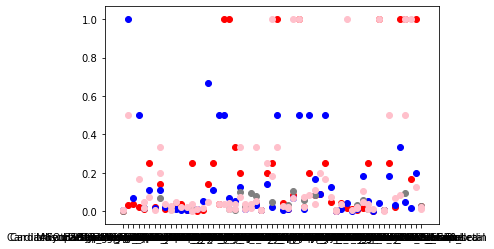

In [4]:
Patient_data_list = []
results_dict = {'Case': [], 'Candidate variants':[], 'GeneName':[], 'GeneID':[], 'Chromosome':[], 'Pos':[], 'Ref':[], 'Alt':[], 'Type':[], 'TRACE_Rank': [], 'CAPICE_Rank':[],  'CADD_Rank': [], 'Sift_Rank':[], 'PolyPhen_Rank':[]}

prec_dict = {'Score_Type': [], 'Percentage':[], 'Case':[]}
ranks_dict = {'Case': [], 'Rank': [], 'Score': []}
c = 0
pathogenic_word = True # 'Yes'
for file_name in patient_files_list:
    
    path = os.path.join('..', '..', 'Results', 'Patients Analysis Results New Imputation2', file_name)

    short_name = file_name.split('_')[0]  + '_' + file_name.split('_')[1]
    if 'brain' in file_name:
        short_name = file_name.split('_')[0]  + '_brain'
    # print(" Case: ", short_name)
    # print(path)
    # try:
    Patient_data = pd.read_csv(path)
    c += 1
    print('----------------------', str(c), short_name, '--------------------------')

    """
    Annotations_file = load_annotations_file(Patient_data, file_name)
    # print(Annotations_file)
    Patient_data = add_relevant_scores(Annotations_file, Patient_data)
    """
    Patient_data = add_capice_scores(Patient_data, Capice_data)
    print(Patient_data.head(10))
    # break
    if pathogenic_word in Patient_data['Is_pathogenic'].unique():
        Patient_data['CADD_Rank'] = Patient_data['PHRED'].rank(ascending=False)
        Patient_data['TRACE_Rank'] = Patient_data['Pathological_probability'].rank(ascending=False)
        Patient_data['Sift_Rank'] = Patient_data['SIFTval'].rank(ascending=True)# SIFT 0 - Causal, 1 - Benign.
        Patient_data['PolyPhen_Rank'] = Patient_data['PolyPhenVal'].rank(ascending=False)
        Patient_data['CAPICE_Rank'] = Patient_data['CAPICE_Score'].rank(ascending=False)

        print(Patient_data[Patient_data['Is_pathogenic']==True])
        cadd_rank = Patient_data['CADD_Rank'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0]
        trace_rank = Patient_data['TRACE_Rank'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0]
        sift_rank = Patient_data['Sift_Rank'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0]
        poly_rank = Patient_data['PolyPhen_Rank'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0]
        capice_rank = Patient_data['CAPICE_Rank'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0]

        print('cadd_rank: ', cadd_rank)
        print('trace_rank: ', trace_rank)
        print('sift_rank: ', sift_rank)
        print('poly_rank: ', poly_rank)
        print('capice_rank: ', capice_rank)

        results_dict['Case'].append(short_name)
        results_dict['TRACE_Rank'].append(trace_rank)
        results_dict['CADD_Rank'].append(cadd_rank)
        results_dict['Sift_Rank'].append(sift_rank)
        results_dict['PolyPhen_Rank'].append(poly_rank)
        results_dict['CAPICE_Rank'].append(capice_rank)
        results_dict['Candidate variants'].append(len(Patient_data))
        results_dict['GeneName'].append(Patient_data['GeneName'][Patient_data['Is_pathogenic']==True].values[0])
        results_dict['GeneID'].append(Patient_data['GeneID_y'][Patient_data['Is_pathogenic']==True].values[0])
        results_dict['Chromosome'].append(Patient_data['#Chr'][Patient_data['Is_pathogenic']==True].values[0])
        results_dict['Pos'].append(Patient_data['Pos'][Patient_data['Is_pathogenic']==True].values[0])
        results_dict['Ref'].append(Patient_data['Ref'][Patient_data['Is_pathogenic']==True].values[0])
        results_dict['Alt'].append(Patient_data['Alt_x'][Patient_data['Is_pathogenic']==True].values[0])
        results_dict['Type'].append(Patient_data['Type'][Patient_data['Is_pathogenic']==True].values[0])




        cadd_prec = stats.percentileofscore(Patient_data['PHRED'].values, Patient_data['PHRED'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0], kind='rank')
        trace_prec = stats.percentileofscore(Patient_data['Pathological_probability'].values, Patient_data['Pathological_probability'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0], kind='rank')
        sift_prec = 100 - stats.percentileofscore(Patient_data['SIFTval'].values, Patient_data['SIFTval'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0], kind='rank') # 0 - causal, 1 - benign
        poly_prec = stats.percentileofscore(Patient_data['PolyPhenVal'].values, Patient_data['PolyPhenVal'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0], kind='rank')
        capice_prec = stats.percentileofscore(Patient_data['CAPICE_Score'].values, Patient_data['CAPICE_Score'][Patient_data['Is_pathogenic'] == pathogenic_word].values[0], kind='rank')

        prec_dict['Score_Type'].append('CADD')
        prec_dict['Percentage'].append(cadd_prec)
        prec_dict['Score_Type'].append('TRACE + CADD')
        prec_dict['Percentage'].append(trace_prec)
        prec_dict['Score_Type'].append('Sift')
        prec_dict['Percentage'].append(sift_prec)
        prec_dict['Score_Type'].append('Polyphen')
        prec_dict['Percentage'].append(poly_prec)
        prec_dict['Score_Type'].append('CAPICE')
        prec_dict['Percentage'].append(capice_prec)
        prec_dict['Case'].append(short_name)
        prec_dict['Case'].append(short_name)
        prec_dict['Case'].append(short_name)
        prec_dict['Case'].append(short_name)
        prec_dict['Case'].append(short_name)




        print('cadd_prec: ', cadd_prec)
        print('trace_prec: ', trace_prec)
        print('sift_prec: ', sift_prec)
        print('poly_prec: ', poly_prec)
        print('capice_prec: ', capice_prec)
        # if c > 6:
        #     break
        ranks_dict['Case'].append(short_name)
        ranks_dict['Case'].append(short_name)
        ranks_dict['Case'].append(short_name)
        ranks_dict['Case'].append(short_name)
        ranks_dict['Case'].append(short_name)

        ranks_dict['Score'].append('TRACE2var')
        ranks_dict['Rank'].append(trace_rank)
        ranks_dict['Score'].append('CAPICE')
        ranks_dict['Rank'].append(capice_rank)
        ranks_dict['Score'].append('CADD')
        ranks_dict['Rank'].append(cadd_rank)
        ranks_dict['Score'].append('SIFT')
        ranks_dict['Rank'].append(sift_rank)
        ranks_dict['Score'].append('PolyPhen')
        ranks_dict['Rank'].append(poly_rank)
        # break
    #     else:
    #         print('No disease gene: ', file_name)
    # except:
    #     print('Problem with file:', file_name)
Results_df = pd.DataFrame.from_dict(results_dict)
Results_df['TRACE_Ratio'] = 1/Results_df['TRACE_Rank']
Results_df['CADD_Ratio'] = 1/Results_df['CADD_Rank']
Results_df['Sift_Ratio'] = 1/Results_df['Sift_Rank']
Results_df['PolyPhen_Ratio'] = 1/Results_df['PolyPhen_Rank']
Results_df['CAPICE_Ratio'] = 1/Results_df['CAPICE_Rank']

trace_sum = Results_df['TRACE_Ratio'].sum()
cadd_sum = Results_df['CADD_Ratio'].sum()
sift_sum = Results_df['Sift_Ratio'].sum()
poly_sum = Results_df['PolyPhen_Ratio'].sum()
capice_sum = Results_df['CAPICE_Ratio'].sum()

trace_mrr = trace_sum/ len( Results_df['TRACE_Ratio'])
cadd_mrr = cadd_sum/ len( Results_df['TRACE_Ratio'])
sift_mrr = sift_sum/ len( Results_df['Sift_Ratio'])
poly_mrr = poly_sum/ len( Results_df['PolyPhen_Ratio'])
capice_mrr = capice_sum/ len( Results_df['CAPICE_Ratio'])

print(Results_df)
print('cadd_mrr: ', cadd_mrr)
print('trace_mrr: ', trace_mrr)
print('sift_mrr: ', sift_mrr)
print('poly_mrr: ', poly_mrr)
print('capice_mrr: ', capice_mrr)

plt.scatter(data=Results_df, x='Case', y='TRACE_Ratio', color = 'red')

plt.scatter(data=Results_df, x='Case', y='CADD_Ratio', color = 'blue')

plt.scatter(data=Results_df, x='Case', y='Sift_Ratio', color = 'grey')

plt.scatter(data=Results_df, x='Case', y='PolyPhen_Ratio', color = 'pink')

plt.scatter(data=Results_df, x='Case', y='CAPICE_Ratio', color = 'pink')


Prec_df = pd.DataFrame.from_dict(prec_dict)
print(Prec_df)
Prec_df['Tissue'] = Prec_df['Case'].str.split('_').str[1]

wilcox_results = stats.mannwhitneyu(Prec_df['Percentage'][Prec_df['Score_Type'] == 'TRACE + CADD'], Prec_df['Percentage'][Prec_df['Score_Type'] == 'Sift'], alternative='less')

print(wilcox_results)
Rank_df = pd.DataFrame.from_dict(ranks_dict)
print(Rank_df)


In [5]:

" ----------------------------- Output ---------------------------------------------------"
output_path = os.path.join('..', '..', 'Results', 'Patients Summery', 'Patients_Results_Ranks_Slim3.csv')
pd.DataFrame.to_csv(Rank_df, output_path, index=False)

output_path = os.path.join('..', '..', 'Results', 'Patients Summery',  'Patients_Results_Summery_Slim3.csv')
pd.DataFrame.to_csv(Results_df, output_path, index=False)

output_path = os.path.join('..', '..', 'Results', 'Patients Summery',  'Patients_For_Ridge_Plot_Slim3.csv')
pd.DataFrame.to_csv(Prec_df, output_path, index=False)

output_path = os.path.join('..', '..', 'Results', 'Patients Summery',  'Patients_Summery_Slim3.csv')
pd.DataFrame.to_csv(Results_df, output_path, index=False)

    Score_Type  Percentage                              Case  \
0         CADD   55.350554  AFOtB1305_Heart - Left Ventricle   
1     TRACEvar   46.402214  AFOtB1305_Heart - Left Ventricle   
2         Sift   35.608856  AFOtB1305_Heart - Left Ventricle   
3     Polyphen   22.509225  AFOtB1305_Heart - Left Ventricle   
4       CAPICE   61.254613  AFOtB1305_Heart - Left Ventricle   
..         ...         ...                               ...   
280       CADD   61.261261           AgenesisOfCC16550_brain   
281   TRACEvar   69.369369           AgenesisOfCC16550_brain   
282       Sift   67.567568           AgenesisOfCC16550_brain   
283   Polyphen   16.666667           AgenesisOfCC16550_brain   
284     CAPICE   31.531532           AgenesisOfCC16550_brain   

                     Tissue  
0    Heart - Left Ventricle  
1    Heart - Left Ventricle  
2    Heart - Left Ventricle  
3    Heart - Left Ventricle  
4    Heart - Left Ventricle  
..                      ...  
280                  

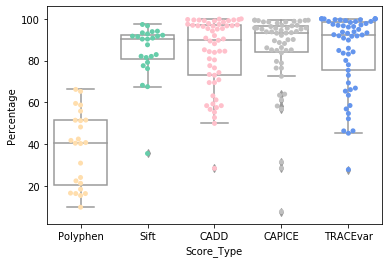

In [6]:

data =  Prec_df
data.loc[data['Score_Type'] == 'TRACE + CADD', 'Score_Type'] = 'TRACEvar'
print(data)

order = ['Polyphen', 'Sift',  'CADD','CAPICE', 'TRACEvar']
my_pal = {"TRACEvar": "cornflowerblue", 'CAPICE': 'silver', "CADD": "pink", "Polyphen":"navajowhite", "Sift":"mediumaquamarine"} #mediumblue
['navajowhite', 'mediumaquamarine',  'pink', 'silver', 'cornflowerblue']
ax = sns.swarmplot(x='Score_Type', y='Percentage', data=data, palette=my_pal, order=order)
ax = sns.boxplot(x='Score_Type', y='Percentage', data=data, color='white', order=order)

path = os.path.join('..', '..', 'Results', 'Patients Summery',  'Compare_Patients_Results3.pdf')

plt.savefig(path)
plt.show()

                                                 Case  Candidate variants  \
0                    AFOtB1305_Heart - Left Ventricle                 542   
1        CardiomyopathyOtB0551_Heart - Left Ventricle                 195   
2                          HSP13393_Muscle - Skeletal                 152   
3   CardiacNeuralSyndrome41621_Heart - Left Ventricle                 115   
4            Musculardystrophy13879_Muscle - Skeletal                 203   
5                        Zellwegersyndrome13414_brain                 241   
6                             SeckelSyndromeSS2_brain                 182   
7                             Leighsyndrome766M_brain                 163   
8                    Skin16264_Skin - Not Sun Exposed                 102   
9                            MicrocephalyOt1097_brain                1071   
10                                   PCCAOt1103_brain                 364   
11                                   NPHPOt1114_brain                 330   

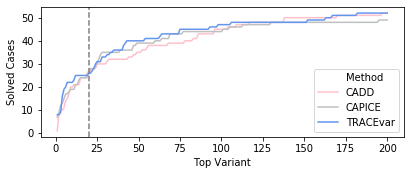

In [7]:
Data = Results_df
print(Data)
results_dict = {'Method':[], 'Top Variant':[], 'Solved Cases': []}
full_methods = ['CADD', 'CAPICE', 'TRACE']
snp_methods = ['Sift', 'PolyPhen']

for threshold in range(1,201):
    for method in full_methods:
        number_solved_cases = len(Data[Data[method + '_Rank'] <= threshold])
        results_dict['Method'].append(method)
        results_dict['Top Variant'].append(threshold)
        results_dict['Solved Cases'].append(number_solved_cases)

Result_df = pd.DataFrame.from_dict(results_dict)
print(Result_df)
Result_df.loc[Result_df['Method'] == 'TRACE', 'Method'] = 'TRACEvar'

sns.lineplot(data=Result_df, x="Top Variant" , y="Solved Cases", hue='Method', palette=[ 'pink', 'silver', 'cornflowerblue'])
plt.subplots_adjust(left=0.13, bottom=0.35, right=0.97, top=0.8, wspace=0, hspace=0)
plt.legend(loc=4)
plt.axvline(x=20, color='grey', linestyle='--', label='Top 20 candidate variants')#label=r'Pathogenic variants frequency = %0.3f' % (pathogenic_proportion

path = os.path.join('..', '..', 'Results', 'Patients Summery',  'Ridge_Summery_Slim3.pdf')
plt.savefig(path)
plt.show()

57
24
       Method  Top Variant  Solved Cases
0        Sift            1             0
1    PolyPhen            1             0
2        CADD            1             0
3      CAPICE            1             3
4       TRACE            1             2
..        ...          ...           ...
995      Sift          200            22
996  PolyPhen          200            23
997      CADD          200            21
998    CAPICE          200            18
999     TRACE          200            21

[1000 rows x 3 columns]


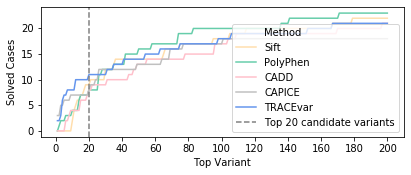

In [8]:
print(len(Data))
Data2 = Data.dropna()
print(len(Data2))
results_dict = {'Method':[], 'Top Variant':[], 'Solved Cases': []}
all_methods = snp_methods + full_methods
for threshold in range(1,201):
    for method in all_methods:
        number_solved_cases = len(Data2[Data2[method + '_Rank'] <= threshold])
        results_dict['Method'].append(method)
        results_dict['Top Variant'].append(threshold)
        results_dict['Solved Cases'].append(number_solved_cases)

Result_df = pd.DataFrame.from_dict(results_dict)
print(Result_df)
Result_df.loc[Result_df['Method'] == 'TRACE', 'Method'] = 'TRACEvar'

sns.lineplot(data=Result_df, x="Top Variant" , y="Solved Cases", hue='Method', palette=['navajowhite', 'mediumaquamarine', 'pink', 'silver', 'cornflowerblue'])#'navajowhite', 'mediumaquamarine',
plt.axvline(x=20, color='grey', linestyle='--', label='Top 20 candidate variants')#label=r'Pathogenic variants frequency = %0.3f' % (pathogenic_proportion
plt.subplots_adjust(left=0.13, bottom=0.35, right=0.97, top=0.8, wspace=0, hspace=0)
plt.legend(loc=4)
plt.xticks(np.arange(0, 201, 20))


path = os.path.join('..', '..', 'Results', 'Patients Summery',  'Ridge_Summery_Slim_SNP3.pdf')

plt.savefig(path)
plt.show()

    Score_Type  Percentage                              Case  \
0         CADD   55.350554  AFOtB1305_Heart - Left Ventricle   
1     TRACEvar   46.402214  AFOtB1305_Heart - Left Ventricle   
2         Sift   35.608856  AFOtB1305_Heart - Left Ventricle   
3     Polyphen   22.509225  AFOtB1305_Heart - Left Ventricle   
4       CAPICE   61.254613  AFOtB1305_Heart - Left Ventricle   
..         ...         ...                               ...   
280       CADD   61.261261           AgenesisOfCC16550_brain   
281   TRACEvar   69.369369           AgenesisOfCC16550_brain   
282       Sift   67.567568           AgenesisOfCC16550_brain   
283   Polyphen   16.666667           AgenesisOfCC16550_brain   
284     CAPICE   31.531532           AgenesisOfCC16550_brain   

                     Tissue  
0    Heart - Left Ventricle  
1    Heart - Left Ventricle  
2    Heart - Left Ventricle  
3    Heart - Left Ventricle  
4    Heart - Left Ventricle  
..                      ...  
280                  

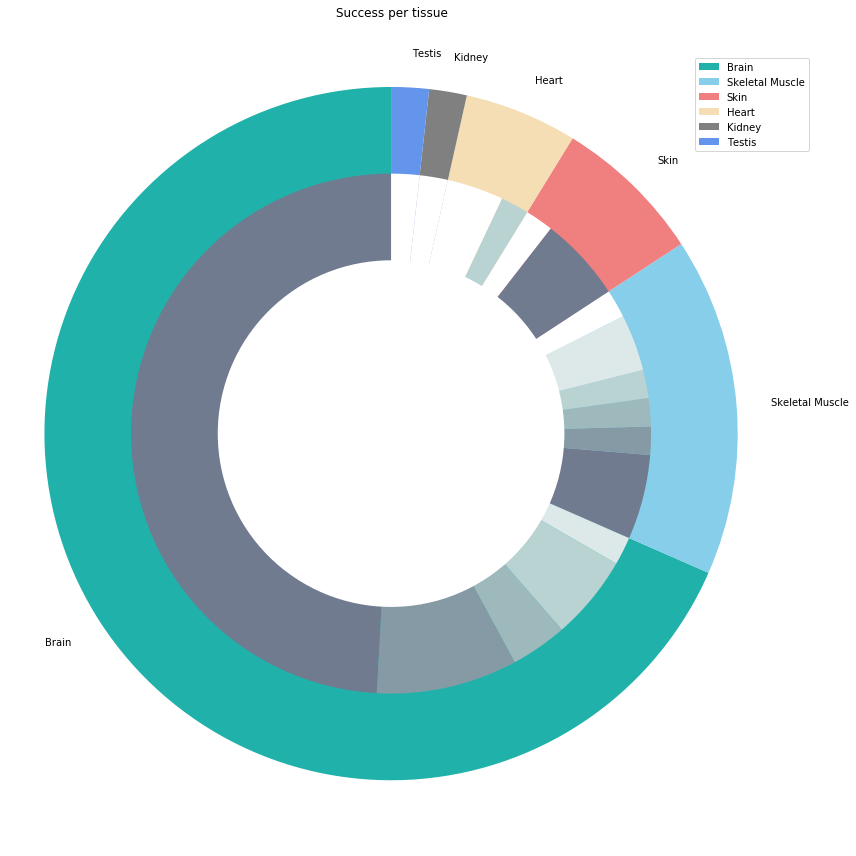

In [18]:
Results = Prec_df
Results.loc[Results['Score_Type'] == 'TRACE + CADD', 'Score_Type'] = 'TRACEvar'

print(Results)
Tissue_Counts = Results.drop_duplicates(subset=['Case'], keep='first')['Tissue'].value_counts()
Tissue_Counts =Tissue_Counts.to_frame().reset_index()
Tissue_Counts.columns = ['Tissue', 'Cases']
print(Tissue_Counts)
thresholds = [10, 20, 30, 40, 50]
thresh_names = []#'Tissue'
for threshold in thresholds:
    Tissue_Counts_Top = Results[(Results['Percentage'] >= 100-threshold) & (Results['Score_Type'] == 'TRACEvar')]['Tissue'].value_counts()
    Tissue_Counts_Top = Tissue_Counts_Top.to_frame().reset_index()
    Tissue_Counts_Top.columns = ['Tissue', 'Top'+'_' + str(threshold)]
    thresh_names.append('Top'+'_' + str(threshold)+ '_a')
    Tissue_Counts = pd.merge(Tissue_Counts, Tissue_Counts_Top, on='Tissue', how='left')
    i = thresholds.index(threshold)
    if i > 0:
        Tissue_Counts['Top'+'_' + str(threshold) +'_a'] = Tissue_Counts['Top'+'_' + str(threshold)] - Tissue_Counts['Top'+'_' + str(thresholds[i-1])]
    else:
        Tissue_Counts['Top' + '_' + str(threshold) + '_a'] = Tissue_Counts['Top'+'_' + str(threshold)]

Tissue_Counts.fillna(0, inplace=True)
Tissue_Counts['Low'] = Tissue_Counts['Cases'].sub(Tissue_Counts[thresh_names].sum(axis=1), axis=0)

print(Tissue_Counts)
path = os.path.join('..', '..', 'Final_Results', 'Random_Forest', 'Patient_Predictions', 'RF_best_parameters_ver_A_Imputation','Summery', 'Cases_success_per_Tissue.csv')
# Tissue_Counts[[c for c in list(Tissue_Counts) if (c in thresh_names)|(c in ['Tissue',  'Cases', 'Low'])]].to_csv(path, index=False)
thresh_names.append('Low')
print(thresh_names)
Relevant_Counts = Tissue_Counts[thresh_names]
print(Relevant_Counts)
list_df = Relevant_Counts.values.tolist()
print(list_df)
one_list = []
labels_list = []
for l in list_df:
    one_list += l
    labels_list += thresh_names
print('one_list', one_list)

labels_list = [s.replace("_a", "") for s in labels_list]
print(labels_list)

Tissue_Counts.loc[Tissue_Counts['Tissue'] == 'Heart - Left Ventricle', 'Tissue'] = 'Heart'
Tissue_Counts.loc[Tissue_Counts['Tissue'] == 'Skin - Not Sun Exposed', 'Tissue'] = 'Skin'
Tissue_Counts.loc[Tissue_Counts['Tissue'] == 'Muscle - Skeletal', 'Tissue'] = 'Skeletal Muscle'
Tissue_Counts.loc[Tissue_Counts['Tissue'] == 'brain', 'Tissue'] = 'Brain'
Tissue_Counts.loc[Tissue_Counts['Tissue'] == 'kidney', 'Tissue'] = 'Kidney'


colors = ['lightseagreen', 'skyblue',  'lightcoral', 'wheat', 'gray', 'cornflowerblue']
colors_top = ['#ffb3e6', '#c2c2f0']
colors1 = plt.cm.bone(np.linspace(0.5, 1, 6))#RdPu_r

plt.pie(Tissue_Counts['Cases'], startangle=90, frame=True, colors=colors, labels=Tissue_Counts['Tissue'])#, colors=colors, labels=Tissue_Counts_ALL['Tissue']
plt.pie(one_list, radius=0.75, startangle=90, labeldistance=10, colors=colors1)#, labels=labels_list)#, labels=labels_list, colors=colors_top
centre_circle = plt.Circle((0, 0), 0.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.set_size_inches(12,12)
fig.gca().add_artist(centre_circle)
fig.legend(bbox_to_anchor=[0.87, 0.87], loc='center', ncol=1)
plt.axis('equal')
plt.title('Success per tissue')
plt.tight_layout()

path = os.path.join('..', '..', 'Results', 'Patients Summery',  'Cases_Tissues_Sum_PiePlot_Slim3.pdf')

plt.savefig(path)
plt.show()



patient_files_list: 58 ['AFOtB1305_Heart - Left Ventricle_Rank.csv', 'CardiomyopathyOtB0551_Heart - Left Ventricle_Rank.csv', 'HSP13393_Muscle - Skeletal_Rank.csv', 'CardiacNeuralSyndrome41621_Heart - Left Ventricle_Rank.csv', 'Musculardystrophy13879_Muscle - Skeletal_Rank.csv', 'Zellwegersyndrome13414_brain_Rank.csv', 'SeckelSyndromeSS2_brain_Rank.csv', 'Leighsyndrome766M_brain_Rank.csv', 'Skin16264_Skin - Not Sun Exposed_Rank.csv', 'MicrocephalyOt1097_brain_Rank.csv', 'PCCAOt1103_brain_Rank.csv', 'NPHPOt1114_brain_Rank.csv', 'NPHPOt1114_kidney_Rank.csv', 'diaphragmaticherniaOt2822_Muscle - Skeletal_Rank.csv', 'SpasticParaparesisOt5005_Muscle - Skeletal_Rank.csv', 'MicrocephalyOt5010_brain_Rank.csv', 'MicrocephalyOB2_brain_Rank.csv', 'NTDOtA4611_brain_Rank.csv', 'HypotoniadevdelayOtA8152_brain_Rank.csv', 'HypotoniadevdelayOtA8152_Muscle - Skeletal_Rank.csv', 'EctodermalOtB0548_Skin - Not Sun Exposed_Rank.csv', 'EctodermalOtB0549_Skin - Not Sun Exposed_Rank.csv', 'Strabismus13556_brain

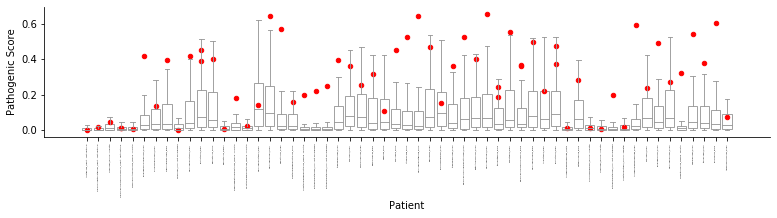

In [10]:
results_path = os.path.join('..', '..', 'Results', 'Patients Analysis Results New Imputation2')

patient_files_list = os.listdir(results_path)
patient_files_list = [x for x in patient_files_list if 'csv' in x]
print('patient_files_list:', len(patient_files_list), patient_files_list)

Patient_data_list = []
for file_name in patient_files_list:


    path  = os.path.join('..', '..', 'Results', 'Patients Analysis Results New Imputation2', file_name)

    Patient_data = pd.read_csv(path)
    Patient_data.columns = [*Patient_data.columns[:-1], 'Pathogenic']
    if True in Patient_data['Pathogenic'].unique():

        Patient_data['color'] = np.where(Patient_data['Pathogenic'] == 'Yes', "#b83d51", "#879299")

        short_name = file_name.split('_')[0]
        Patient_data['Patient'] = short_name + '_' + file_name.split('_')[1]
        Patient_data['Tissue'] = file_name.split('_')[1]
        if 'brain' in file_name:
            Patient_data['Patient'] = short_name + '_brain'
            Patient_data['Tissue'] = 'brain'
        Patient_data_list.append(Patient_data)

All_Patient_data = pd.concat(Patient_data_list)

print (All_Patient_data)
print(All_Patient_data.Tissue.unique())
pal = {'Heart - Left Ventricle':'lightcoral', 'brain':'cornflowerblue', 'Testis':'paleboldenrod', 'Muscle - Skeletal':'coral', 'Skin - Not Sun Exposed':'peru', 'kidney':'plum'}

All_Patient_data['color'] ='grey'
for key in pal:
    All_Patient_data.loc[All_Patient_data['Tissue'] == key, 'color'] = pal[key]
print (All_Patient_data['color'])
All_Patient_data.rename(columns={'Pathological_probability':'Pathogenic Score'}, inplace=True)
ax = sns.catplot(data=All_Patient_data, x='Patient', y='Pathogenic Score', linewidth=0.9, showfliers=False, kind='box', color='white')#, row_order=pb_genomes), palette=All_Patient_data['color']
plt.scatter(data=All_Patient_data[All_Patient_data['Pathogenic'] == True], x='Patient', y='Pathogenic Score', color = 'red', s=20)

ax.set_xticklabels(rotation = (90), fontsize = 2)#, va='bottom', ha='left'
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.tight_layout()

plt.subplots_adjust(left=0.13, bottom=0.35, right=0.97, top=0.8, wspace=0, hspace=0)
path_fig = os.path.join('..', '..', 'Results', 'Patients Summery', 'All_Patients_plot_Imputation3.pdf')

plt.savefig(path_fig)
plt.show()

57


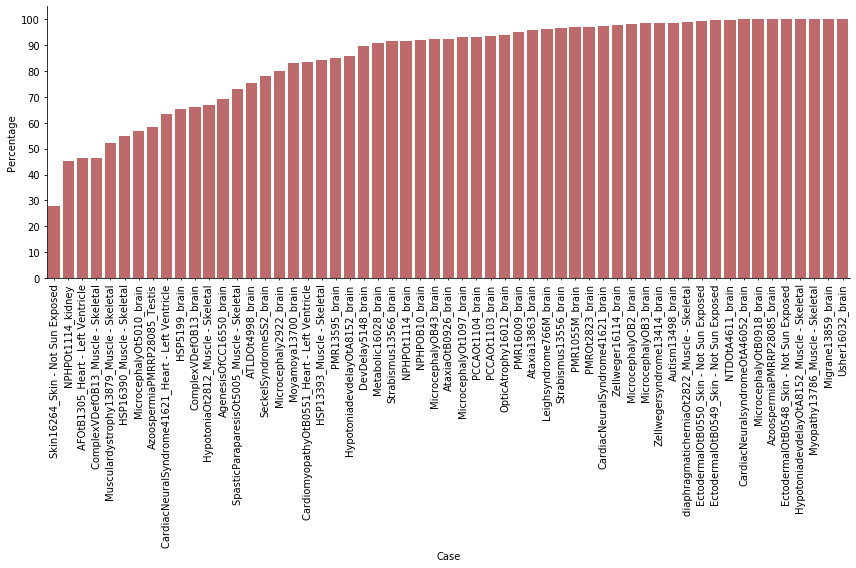

In [11]:
import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True


TRACEvar_Prioritization = data[data['Score_Type'] == 'TRACEvar'].copy(deep=True)
TRACEvar_Prioritization['Rank top %'] = 100 - TRACEvar_Prioritization['Percentage']
TRACEvar_Prioritization.sort_values(by='Rank top %', inplace=True, ascending = False)
print(len(TRACEvar_Prioritization))

fig = plt.gcf()
fig.set_size_inches(12, 8)

ax = sns.barplot(x='Case', y="Percentage", data=TRACEvar_Prioritization, order=TRACEvar_Prioritization['Case'].tolist(), color='indianred')#'indianred'
ax.tick_params(axis='x', labelrotation=90, size=2)
plt.yticks(np.arange(0,110,10))

plt.tight_layout()
path_fig = os.path.join('..', '..', 'Results', 'Patients Summery', 'All_Patients_Percentage.pdf')
plt.savefig(path_fig)


In [19]:
for t in range(0, 100, 5):
    top_cases = len(TRACEvar_Prioritization[TRACEvar_Prioritization['Percentage'] >= 100-t])
    percent = (top_cases)/57 * 100
    print('@', 'Threshold =', str(100- t), 'Num=', top_cases, 'Percent =', percent)

@ Threshold = 100 Num= 8 Percent = 14.035087719298245
@ Threshold = 95 Num= 23 Percent = 40.35087719298245
@ Threshold = 90 Num= 34 Percent = 59.64912280701754
@ Threshold = 85 Num= 36 Percent = 63.1578947368421
@ Threshold = 80 Num= 41 Percent = 71.9298245614035
@ Threshold = 75 Num= 43 Percent = 75.43859649122807
@ Threshold = 70 Num= 44 Percent = 77.19298245614034
@ Threshold = 65 Num= 48 Percent = 84.21052631578947
@ Threshold = 60 Num= 49 Percent = 85.96491228070175
@ Threshold = 55 Num= 51 Percent = 89.47368421052632
@ Threshold = 50 Num= 53 Percent = 92.98245614035088
@ Threshold = 45 Num= 56 Percent = 98.24561403508771
@ Threshold = 40 Num= 56 Percent = 98.24561403508771
@ Threshold = 35 Num= 56 Percent = 98.24561403508771
@ Threshold = 30 Num= 56 Percent = 98.24561403508771
@ Threshold = 25 Num= 57 Percent = 100.0
@ Threshold = 20 Num= 57 Percent = 100.0
@ Threshold = 15 Num= 57 Percent = 100.0
@ Threshold = 10 Num= 57 Percent = 100.0
@ Threshold = 5 Num= 57 Percent = 100.0


In [13]:
print(TRACEvar_Prioritization['Percentage'].mean())
print(TRACEvar_Prioritization['Percentage'].median())

84.70551064811399
92.41379310344827
